In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns



Matplotlib is building the font cache; this may take a moment.


In [14]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
advertising.shape

(200, 4)

In [7]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Checking Null values
advertising.isnull().sum()  /advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

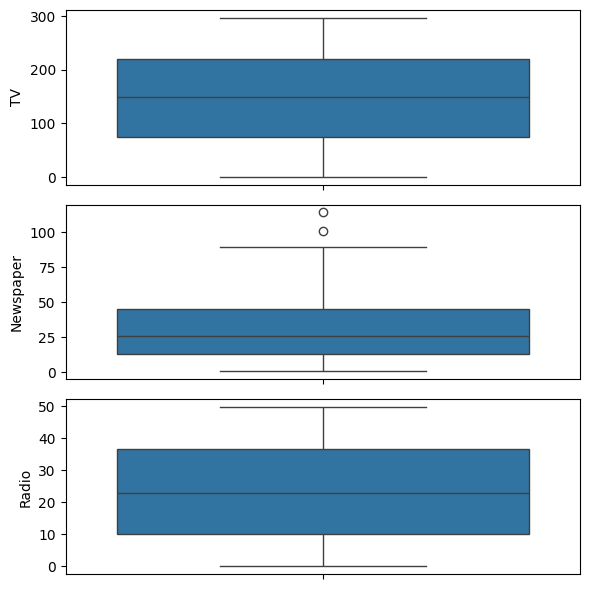

In [26]:
# Outlier Analysis - vo points jo dataset se alag jare ho
fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()


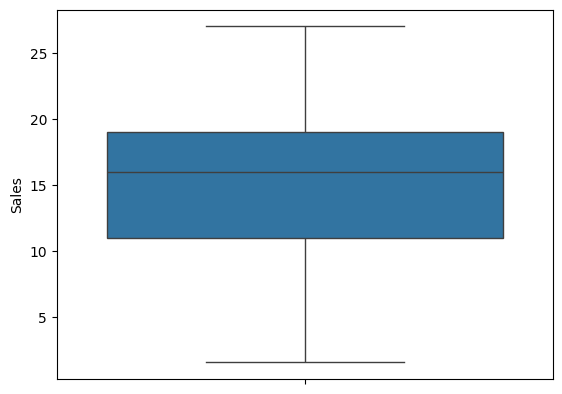

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

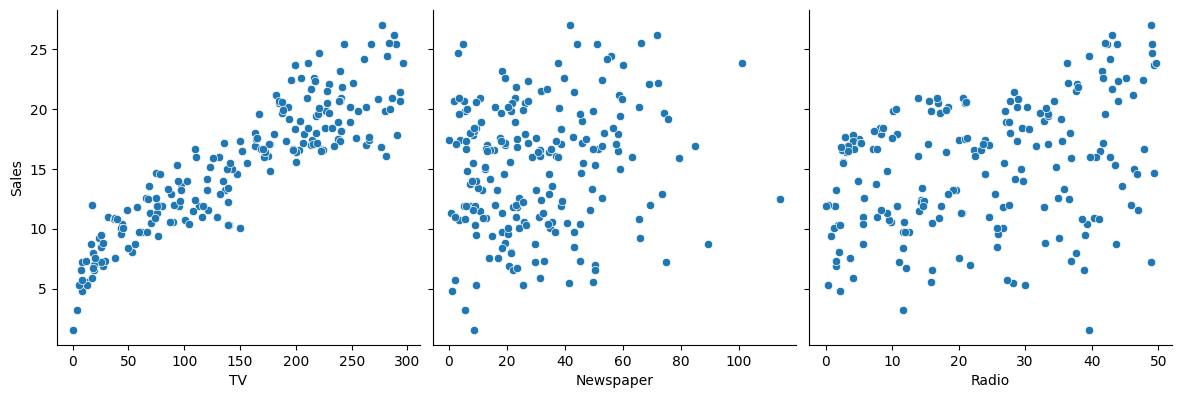

In [28]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

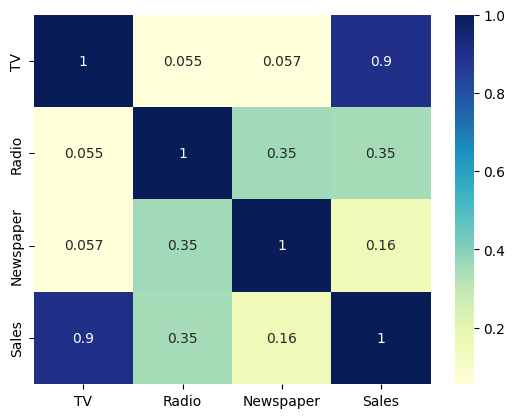

In [37]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [38]:
X = advertising['TV']
y = advertising['Sales']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 70)

In [43]:
X_train.head()


7      120.2
162    188.4
193    166.8
145    140.3
5        8.7
Name: TV, dtype: float64

In [42]:
y_train.head()

7      13.2
162    19.9
193    19.6
145    10.3
5       7.2
Name: Sales, dtype: float64

In [44]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [46]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.897472
TV       0.055415
dtype: float64

In [47]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     591.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           9.43e-52
Time:                        16:10:10   Log-Likelihood:                -313.93
No. Observations:                 140   AIC:                             631.9
Df Residuals:                     138   BIC:                             637.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8975      0.371     18.613      0.0

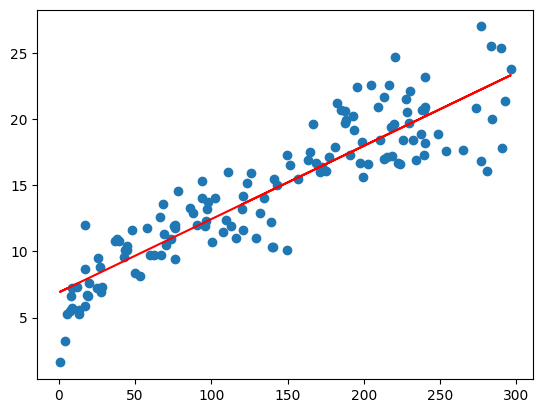

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.8974 + 0.0554*X_train, 'r')
plt.show()


In [49]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

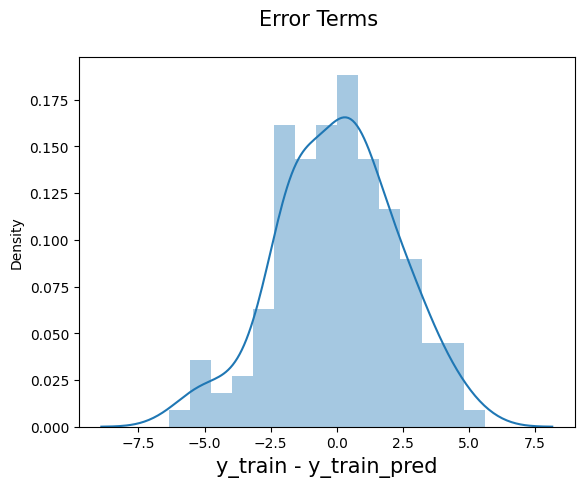

In [50]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

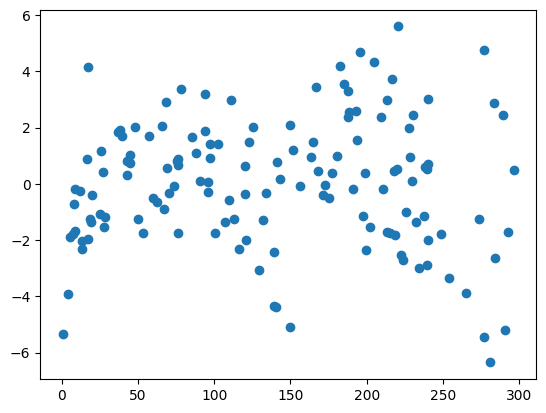

In [51]:
plt.scatter(X_train,res)
plt.show()


In [52]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [53]:
y_pred.head()


115    11.059152
17     22.491302
164    13.392131
197    16.705958
57     14.445019
dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [55]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))


np.float64(2.3033429520723696)

In [56]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.79744961408695

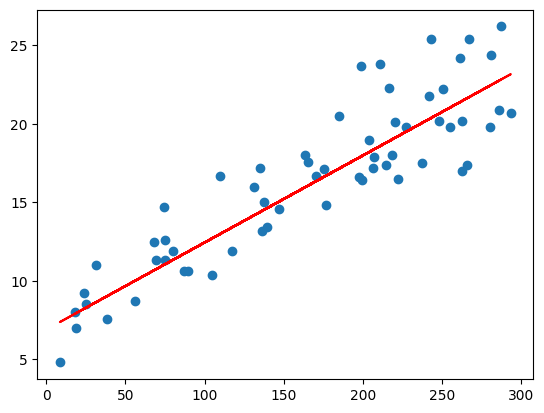

In [58]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.8974 + 0.0554 * X_test, 'r')
plt.show()
